In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print("Display the results of the asymptotic analysis on the Sorting Algorithms:")

Display the results of the asymptotic analysis on the Sorting Algorithms:


In [3]:
# Get the current working directory
current_folder = os.getcwd()
print("Current folder:", current_folder)

Current folder: /home/tanasa/Desktop/DSA_asymptotic_analysis/plot_results


In [4]:
# List all files in the current folder that contain the information about the execution times

files = []

# Iterate over all items in the folder
for item in os.listdir(current_folder):
    if os.path.isfile(os.path.join(current_folder, item)):
        files.append(item)

print("Files in the current folder:")
print(files)

Files in the current folder:
['test_patients_diseases_500000.txt_execution_times.txt', 'test_patients_diseases_1500000.txt_execution_times.txt', 'test_patients_diseases_100000.txt_execution_times.txt', 'test_patients_diseases_1300000.txt_execution_times.txt', 'test_patients_diseases_600000.txt_execution_times.txt', 'test_patients_diseases_800000.txt_execution_times.txt', 'part3_display_the_execution_times.ipynb', 'the_execution_times_summary.csv', 'test_patients_diseases_700000.txt_execution_times.txt', 'test_patients_diseases_300000.txt_execution_times.txt', 'test_patients_diseases_900000.txt_execution_times.txt', 'test_patients_diseases_200000.txt_execution_times.txt', 'test_patients_diseases_1200000.txt_execution_times.txt', 'test_patients_diseases_1100000.txt_execution_times.txt', 'test_patients_diseases_400000.txt_execution_times.txt', 'test_patients_diseases_1400000.txt_execution_times.txt']


In [5]:
# Pilot Code
# Show the content of a FIRST file in the folder, verify its content and prepare a DATAFRAME to store the RESULTS

if files:
    first_file = files[0]          # Get the first file
    first_file_path = os.path.join(current_folder, first_file)

    # Open and read the content of the first file
    with open(first_file_path, 'r') as file:
        content = file.read()

        # Original filename :  
        print("File name:", first_file)

        # Use a regular expression to extract the desired part of the filename
        match = re.search(r'\d+', first_file)

        # Check if the pattern is found
        if match:
           extracted_name = match.group()  # Extract the matched text
           print(f"Variable name: {extracted_name}")
        else:
           print("Pattern not found in the filename.")
else:
    print("No files found in the folder.")

File name: test_patients_diseases_500000.txt_execution_times.txt
Variable name: 500000


In [6]:
# Apply the same procedure for all the files that contain the execution times for each sorting algorithm

In [7]:
# List to store data for the DataFrame
data = []

# Process each file in the folder
for afile in files:
    print("\nProcessing file:", afile)

    # Step 1: Extract the file name
    match = re.search(r'\d+', afile)

    if match:
        variable_name = match.group() 
        print(f"Recorded name: {variable_name}")
    else:
        print("Pattern not found in the filename.")
        continue  # Skip to the next file if pattern is not found

    # Step 2: Extract the information from the file content
    try:
        with open(os.path.join(current_folder, afile), 'r') as file:
            for line in file:
                if "Execution Time for" in line:
                    
                    # Extract sort type and execution time
                    parts = line.split(":")
                    algorithm = parts[0].replace("Execution Time for", "").strip()
                    time_in_seconds = float(parts[1].strip().split()[0])  # Extract time as float
                    
                    # Append the variable name, algorithm, and time to the data list
                    data.append([variable_name, algorithm, time_in_seconds])

    except Exception as e:
        print(f"Could not process file '{afile}': {e}")

# Step 3: Create a DataFrame from the collected data
df = pd.DataFrame(data, columns=["patients", "algorithm", "time"])

# Display the DataFrame
print("\nDataFrame of Execution Times:")
print(df)

# Save the DataFrame to a CSV file
# df.to_csv("the_execution_times_summary.csv", index=False)


Processing file: test_patients_diseases_500000.txt_execution_times.txt
Recorded name: 500000

Processing file: test_patients_diseases_1500000.txt_execution_times.txt
Recorded name: 1500000

Processing file: test_patients_diseases_100000.txt_execution_times.txt
Recorded name: 100000

Processing file: test_patients_diseases_1300000.txt_execution_times.txt
Recorded name: 1300000

Processing file: test_patients_diseases_600000.txt_execution_times.txt
Recorded name: 600000

Processing file: test_patients_diseases_800000.txt_execution_times.txt
Recorded name: 800000

Processing file: part3_display_the_execution_times.ipynb
Recorded name: 3
Could not process file 'part3_display_the_execution_times.ipynb': could not convert string to float: '\\n",'

Processing file: the_execution_times_summary.csv
Pattern not found in the filename.

Processing file: test_patients_diseases_700000.txt_execution_times.txt
Recorded name: 700000

Processing file: test_patients_diseases_300000.txt_execution_times.t

In [8]:
# Exclude rows with "Insertion Sort"
df2 = df[df['algorithm'] != 'Insertion Sort']

# Display the updated DataFrame
print(df2)

# Exclude rows with 10000 patients
# df3 = df2[df2['patients'] != 10000]

# Display the updated DataFrame
# print(df3)

   patients       algorithm           time
0    500000      Merge Sort      18.686575
1    500000     Bubble Sort   13981.295418
2    500000       Heap Sort       1.698226
3    500000      Quick Sort       1.763028
5    500000  Selection Sort   15598.190031
..      ...             ...            ...
92  1400000     Bubble Sort   97405.894848
93  1400000       Heap Sort       4.754582
94  1400000      Quick Sort       3.677329
96  1400000  Selection Sort  104919.583853
97  1400000   Counting Sort     205.826814

[84 rows x 3 columns]


In [9]:
df = df2
# Save the DataFrame to a CSV file
df.to_csv("the_execution_times_summary.csv", index=False)

algorithm
Quick Sort            2.109326
Heap Sort             2.899786
Counting Sort        93.875282
Merge Sort          154.358874
Bubble Sort       45098.332544
Selection Sort    47026.475501
Name: time, dtype: float64


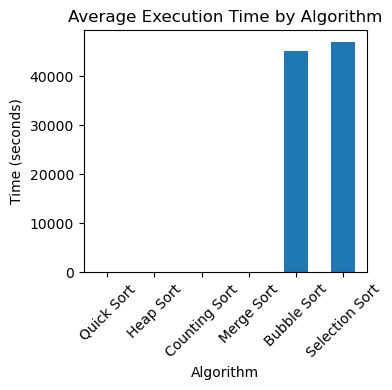

In [10]:
# Display the AVERAGE RUNNING TIMES of each algorithm

average_times = df.groupby('algorithm')['time'].mean().sort_values()
print(average_times)

plt.figure(figsize=(4, 4))
average_times.plot(kind='bar')
plt.title('Average Execution Time by Algorithm')
plt.ylabel('Time (seconds)')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   patients      algorithm        time
0    500000     Merge Sort   18.686575
2    500000      Heap Sort    1.698226
3    500000     Quick Sort    1.763028
6    500000  Counting Sort   43.482496
7   1500000     Merge Sort  273.391127
9   1500000      Heap Sort    5.374583
10  1500000     Quick Sort    4.119772
13  1500000  Counting Sort  278.945446
14   100000     Merge Sort    0.594211
16   100000      Heap Sort    0.210285
17   100000     Quick Sort    0.111232
20   100000  Counting Sort    0.626173
21  1300000     Merge Sort  235.658293
23  1300000      Heap Sort    4.519081
24  1300000     Quick Sort    3.221325
27  1300000  Counting Sort  184.570541
28   600000     Merge Sort   28.526258
30   600000      Heap Sort    1.978437
31   600000     Quick Sort    1.378542
34   600000  Counting Sort   43.081440
35   800000     Merge Sort   59.369096
37   800000      Heap Sort    2.852775
38   800000     Quick Sort    2.075678
41   800000  Counting Sort   73.873310
42   700000     Merge Sor

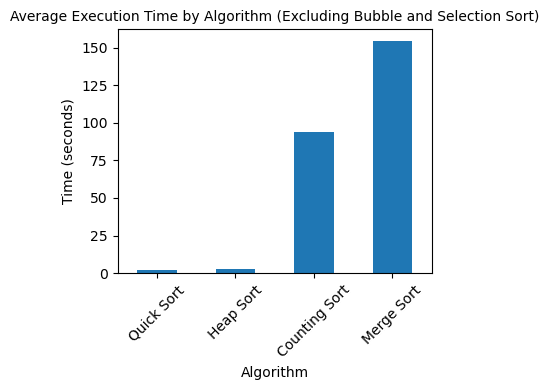

In [11]:
# Filter the DataFrame to exclude "Bubble Sort" and "Selection Sort"
df2 = df[df['algorithm'].isin(['Bubble Sort', 'Selection Sort']) == False]
print(df2)

# Calculate the mean execution times for the filtered algorithms
average_times2 = df2.groupby('algorithm')['time'].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(4, 4))
average_times2.plot(kind='bar')
plt.title('Average Execution Time by Algorithm (Excluding Bubble and Selection Sort)', fontsize=10)
plt.ylabel('Time (seconds)')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df_pivot = df.pivot(index='patients', columns='algorithm', values='time')
print(df_pivot)

df2_pivot = df2.pivot(index='patients', columns='algorithm', values='time')
print(df2_pivot)

algorithm    Bubble Sort  Counting Sort  Heap Sort  Merge Sort  Quick Sort  \
patients                                                                     
100000        263.964490       0.626173   0.210285    0.594211    0.111232   
1100000     60991.291350     124.066099   3.749467  543.709285    2.683577   
1200000     76951.376644     145.665322   4.166048  457.020414    2.358185   
1300000     86743.009707     184.570541   4.519081  235.658293    3.221325   
1400000     97405.894848     205.826814   4.754582  282.637826    3.677329   
1500000    108552.007110     278.945446   5.374583  273.391127    4.119772   
200000       2248.139534       4.003029   1.156607    2.464441    0.514784   
300000       4997.949977       8.131838   1.485917    5.352002    1.684997   
400000      10870.516003      22.825023   1.570626   10.560799    0.766171   
500000      13981.295418      43.482496   1.698226   18.686575    1.763028   
600000      20762.277732      43.081440   1.978437   28.526258  

In [13]:
# Sort the dataframe indexes

df_pivot.index = df_pivot.index.astype(int)
df_pivot_sorted = df_pivot.sort_index()
print(df_pivot_sorted)

df2_pivot.index = df2_pivot.index.astype(int)
df2_pivot_sorted = df2_pivot.sort_index()
print(df2_pivot_sorted)

algorithm    Bubble Sort  Counting Sort  Heap Sort  Merge Sort  Quick Sort  \
patients                                                                     
100000        263.964490       0.626173   0.210285    0.594211    0.111232   
200000       2248.139534       4.003029   1.156607    2.464441    0.514784   
300000       4997.949977       8.131838   1.485917    5.352002    1.684997   
400000      10870.516003      22.825023   1.570626   10.560799    0.766171   
500000      13981.295418      43.482496   1.698226   18.686575    1.763028   
600000      20762.277732      43.081440   1.978437   28.526258    1.378542   
700000      42282.787951      57.871178   2.936151  115.650333    1.921276   
800000      45190.789656      73.873310   2.852775   59.369096    2.075678   
900000      60135.355199     121.285237   4.144224  127.403574    3.254671   
1100000     60991.291350     124.066099   3.749467  543.709285    2.683577   
1200000     76951.376644     145.665322   4.166048  457.020414  

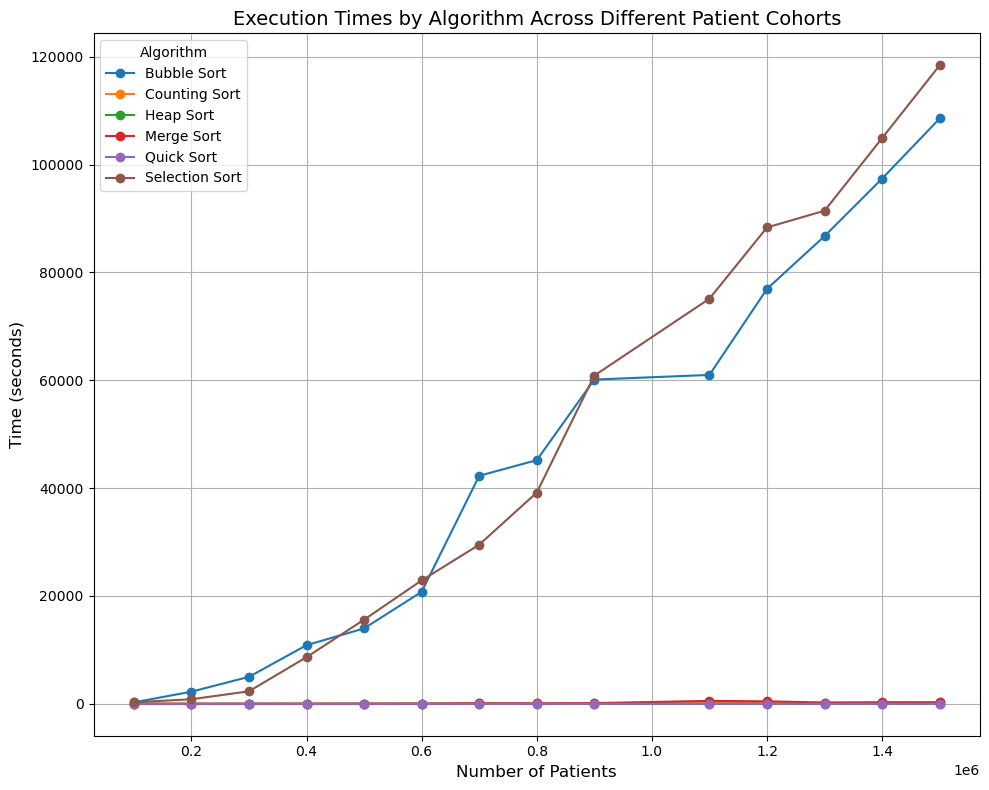

In [14]:
# Plot a line for each algorithm
plt.figure(figsize=(10, 8))
for algorithm in df_pivot_sorted.columns:
    plt.plot(df_pivot_sorted.index, df_pivot_sorted[algorithm], marker='o', label=algorithm)

# Add titles and labels
plt.title('Execution Times by Algorithm Across Different Patient Cohorts', fontsize=14)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(title='Algorithm')
plt.grid(True)
plt.tight_layout()
plt.show()

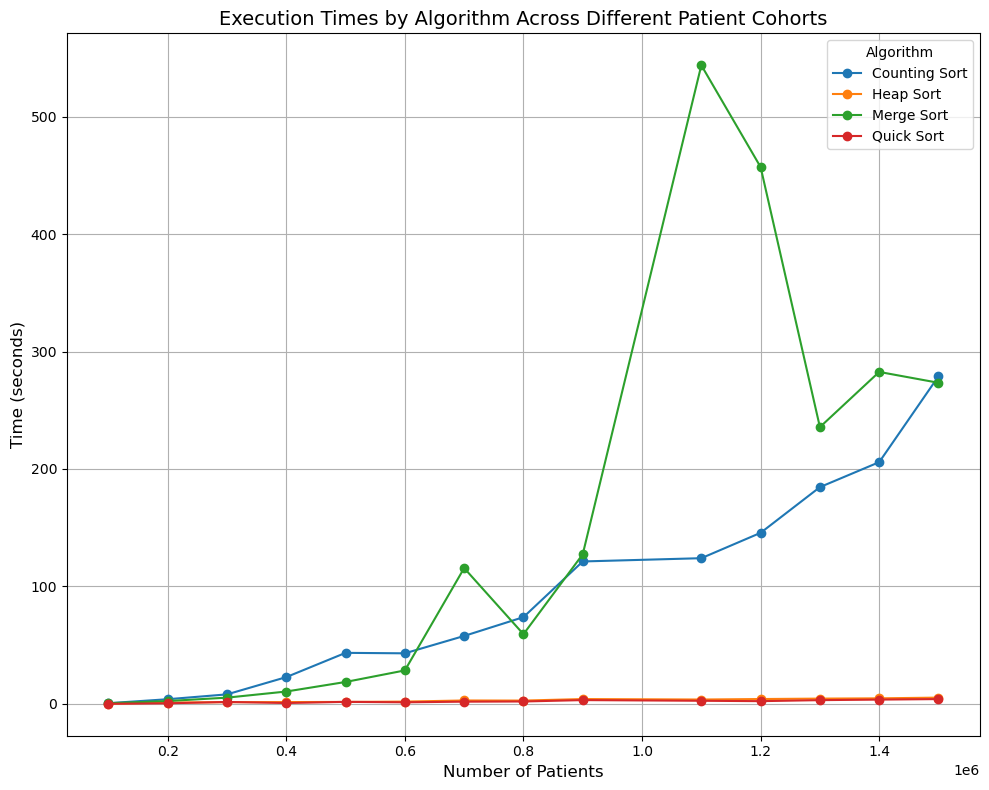

In [15]:
# Plot a line for each algorithm
plt.figure(figsize=(10, 8))
for algorithm in df2_pivot_sorted.columns:
    plt.plot(df2_pivot_sorted.index, df2_pivot_sorted[algorithm], marker='o', label=algorithm)

# Add titles and labels
plt.title('Execution Times by Algorithm Across Different Patient Cohorts', fontsize=14)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(title='Algorithm')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Filter the DataFrame to keep only "Quick Sort" and "Heap Sort"
df3 = df2[df2['algorithm'].isin(['Quick Sort', 'Heap Sort']) == True]
print(df3)

# Calculate the mean execution times for the filtered algorithms
average_times3 = df3.groupby('algorithm')['time'].mean().sort_values()

# Pivot / reshape the table
df3_pivot = df3.pivot(index='patients', columns='algorithm', values='time')
print(df3_pivot)

# Sort the dataframe indexes
df3_pivot.index = df3_pivot.index.astype(int)
df3_pivot_sorted = df3_pivot.sort_index()
print(df3_pivot_sorted)

   patients   algorithm      time
2    500000   Heap Sort  1.698226
3    500000  Quick Sort  1.763028
9   1500000   Heap Sort  5.374583
10  1500000  Quick Sort  4.119772
16   100000   Heap Sort  0.210285
17   100000  Quick Sort  0.111232
23  1300000   Heap Sort  4.519081
24  1300000  Quick Sort  3.221325
30   600000   Heap Sort  1.978437
31   600000  Quick Sort  1.378542
37   800000   Heap Sort  2.852775
38   800000  Quick Sort  2.075678
44   700000   Heap Sort  2.936151
45   700000  Quick Sort  1.921276
51   300000   Heap Sort  1.485917
52   300000  Quick Sort  1.684997
58   900000   Heap Sort  4.144224
59   900000  Quick Sort  3.254671
65   200000   Heap Sort  1.156607
66   200000  Quick Sort  0.514784
72  1200000   Heap Sort  4.166048
73  1200000  Quick Sort  2.358185
79  1100000   Heap Sort  3.749467
80  1100000  Quick Sort  2.683577
86   400000   Heap Sort  1.570626
87   400000  Quick Sort  0.766171
93  1400000   Heap Sort  4.754582
94  1400000  Quick Sort  3.677329
algorithm  Hea

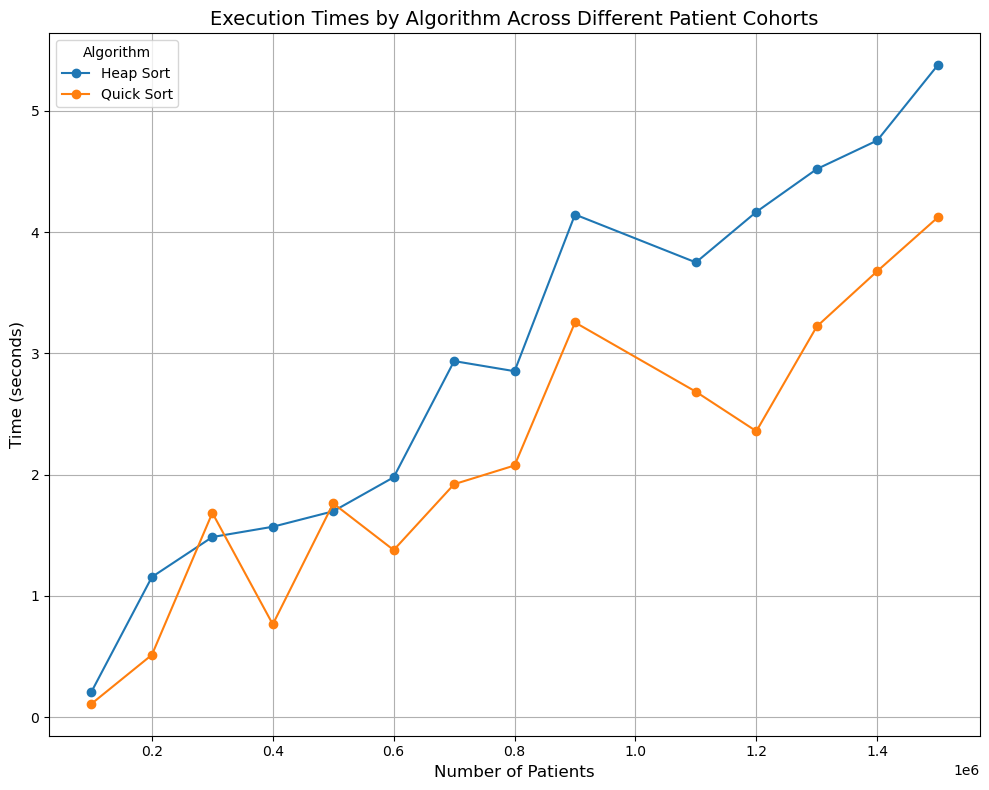

In [17]:
# Plot a line for each algorithm
plt.figure(figsize=(10, 8))
for algorithm in df3_pivot_sorted.columns:
    plt.plot(df3_pivot_sorted.index, df3_pivot_sorted[algorithm], marker='o', label=algorithm)

# Add titles and labels
plt.title('Execution Times by Algorithm Across Different Patient Cohorts', fontsize=14)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.legend(title='Algorithm')
plt.grid(True)
plt.tight_layout()
plt.show()